In [1]:
from __future__ import print_function

import math

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as snf

%matplotlib inline

from realization import realization
from realization import pixel_sample as pixs

In [2]:
nx = 1024
nw = 32
winfunc_x = np.zeros(nx, dtype=np.float)
winfunc_x[:nw] = 1
winfunc_x /= winfunc_x.sum()

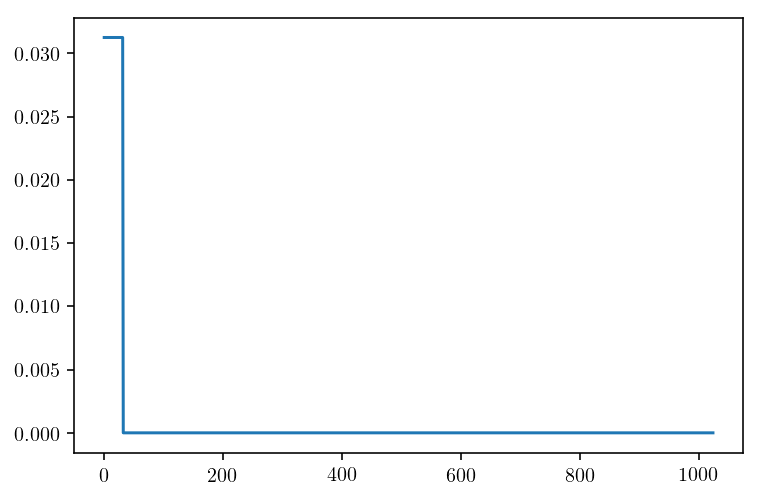

In [3]:
plt.plot(winfunc_x)

In [4]:
winfunc_k = np.fft.rfftn(winfunc_x)
kvals = realization.get_k(winfunc_x.shape)
abskvals = np.sqrt(realization.get_k2(winfunc_x.shape))

#### note that we NEED to divide out by the single-pixel pixwin!
winfunc_k_th = pixs.pixelWindow1D(abskvals,nw)/pixs.pixelWindow1D(abskvals,1)

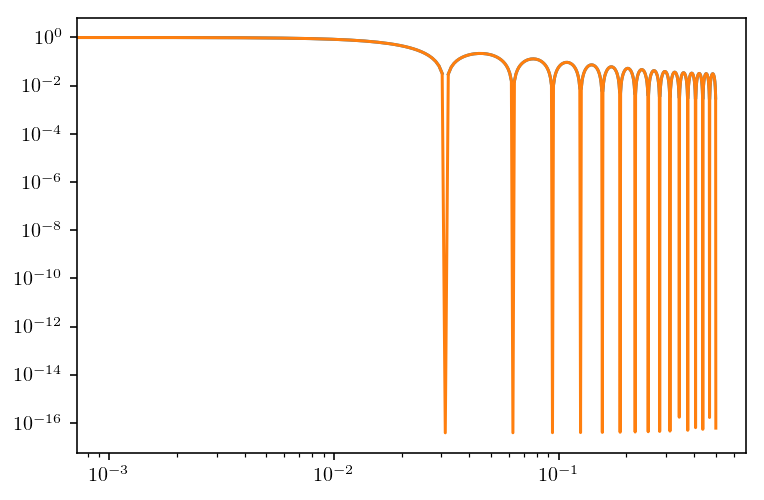

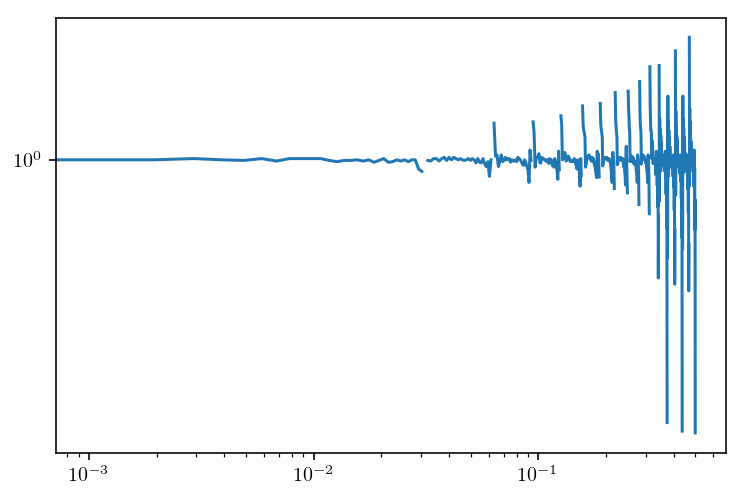

In [11]:
pltr = plt.loglog
pltr(abskvals, np.abs(winfunc_k), nonposy='mask')
pltr(abskvals, np.abs(winfunc_k_th), nonposy='mask')
plt.figure()
pltr(abskvals, np.abs(winfunc_k)/np.abs(winfunc_k_th), nonposy='mask')



In [6]:
a = np.random.randn?

In [ ]:
a = np.random.randn

In [7]:
a = np.random.randn

In [8]:
npix1d=256
a = np.random.randn(npix1d, npix1d)
f = np.zeros_like(a)
b = snf.uniform_filter(a, size=16, output=f)

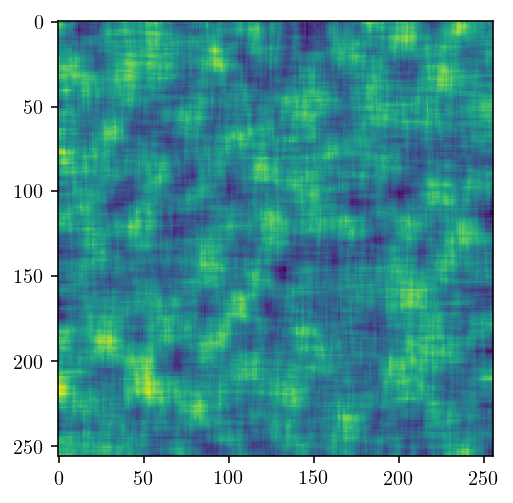

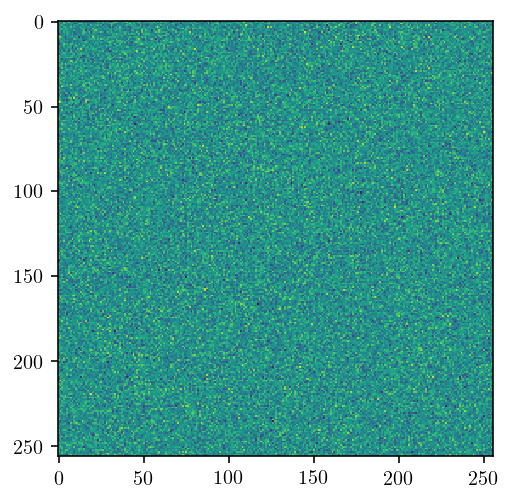

In [9]:
plt.figure(); plt.imshow(f)
plt.figure(); plt.imshow(a)


In [10]:
print(b)

[[ 0.11760838  0.10042318  0.0707206  ...  0.02299126  0.01262229
   0.0146809 ]
 [ 0.14185879  0.12103819  0.09157723 ...  0.02982633  0.01942041
   0.02069132]
 [ 0.17401186  0.14988692  0.13065743 ...  0.018067    0.0050243
   0.01906438]
 ...
 [ 0.09221842  0.06967989  0.04437585 ... -0.16446336 -0.1346646
  -0.18853498]
 [ 0.13391097  0.10403823  0.08344628 ... -0.15042014 -0.1173715
  -0.17907553]
 [ 0.19197733  0.14661545  0.1108342  ... -0.13748785 -0.10773961
  -0.16462687]]
